In [176]:
#Import to process file
import pandas as pd
import csv
import os

#File directory
file_directory = "Raw Data/3_8_18 Bruno/"
file_list = os.listdir(file_directory)

#Read file 
file = pd.read_csv(file_directory + file_list[1], header = None, sep = ';', names = ['timestamp','x','y','z'], parse_dates = ['timestamp'])
file.head()

,timestamp,x,y,z
0,2018-03-13 20:27:05,0.004638,-1.060791,-0.159668
1,2018-03-13 20:27:05,0.004638,-1.060791,-0.159668
2,2018-03-13 20:27:05,-0.017333,-0.990722,-0.168945
3,2018-03-13 20:27:05,-0.015136,-0.992188,-0.172852
4,2018-03-13 20:27:05,-0.017089,-0.993896,-0.172363


In [177]:
#Row x columns
file.shape

(36531, 4)

In [178]:
#Elapsed time for sample session
file['timestamp'].iloc[-1] - file['timestamp'].iloc[0]

Timedelta('0 days 00:12:11')

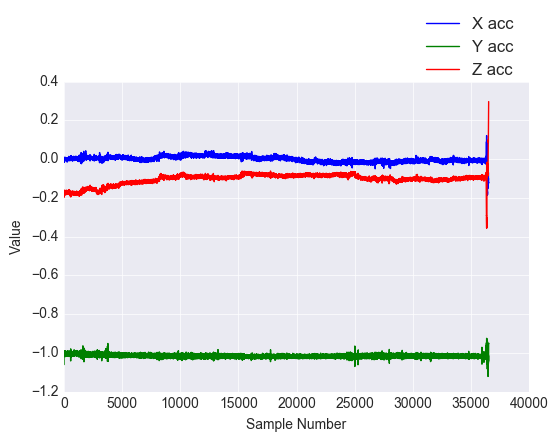

In [179]:
#Plot the raw data
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

x, = plt.plot(file['x'], label='X acc')
y, = plt.plot(file['y'], label='Y acc')
z, = plt.plot(file['z'], label='Z acc')
plt.legend(bbox_to_anchor=(0.9, 1.1), bbox_transform=plt.gcf().transFigure, handles=[x, y, z])
plt.xlabel('Sample Number')
plt.ylabel('Value')
plt.show()

In [180]:
#Truncate last 500 samples due to noise 
file = file[:-500]

#Truncate first 100 samples due to noise
file = file[100:]

In [181]:
#Make sure truncate worked
file.shape

(35931, 4)

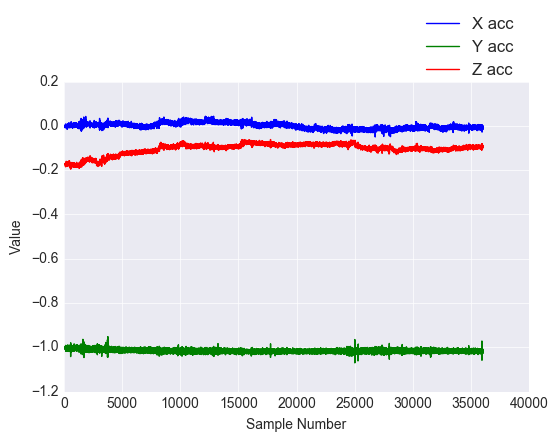

In [182]:
#Plot truncated data
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

x, = plt.plot(file['x'], label='X acc')
y, = plt.plot(file['y'], label='Y acc')
z, = plt.plot(file['z'], label='Z acc')
plt.legend(bbox_to_anchor=(0.9, 1.1), bbox_transform=plt.gcf().transFigure, handles=[x, y, z])
plt.xlabel('Sample Number')
plt.ylabel('Value')
plt.show()

In [183]:
#Time dataframe
time = file['timestamp']

#Positional datafram
position = file.drop(['timestamp'], axis = 1)

In [184]:
position.head()

,x,y,z
100,-0.005615,-1.009033,-0.176026
101,-0.000489,-1.001220,-0.175293
102,-0.002441,-1.001220,-0.170898
103,-0.009277,-0.996826,-0.174805
104,-0.007324,-0.998046,-0.173341


In [185]:
#Normalize data 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

position = scaler.fit_transform(position)

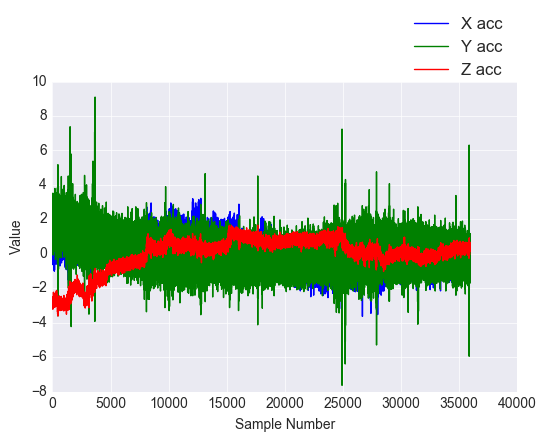

In [186]:
#Plot normalized data
x, = plt.plot(position[:,0], label='X acc')
y, = plt.plot(position[:,1], label='Y acc')
z, = plt.plot(position[:,2], label='Z acc')
plt.legend(bbox_to_anchor=(0.9, 1.1), bbox_transform=plt.gcf().transFigure, handles=[x, y, z])
plt.xlabel('Sample Number')
plt.ylabel('Value')
plt.show()

In [187]:
"""
This method will compute a rolling mean and apply it to the array
"""
def rolling_mean(arr, window):
    
    mean_arr = []
    arr_len = arr.shape[0]
    n_windows = int(arr_len/window)
    
    for win in range(arr_len):
        start = win
        end = start + window
        mean = mean_arr.append(np.mean(arr[start:end]))
        
    new_arr = arr/mean_arr
    
    return new_arr


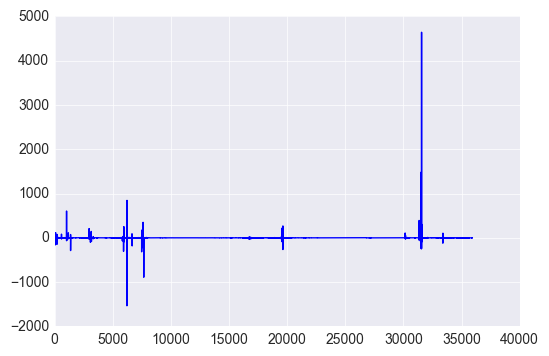

In [195]:
#Plot X position array with window size 35
x = rolling_mean(position[:,0], 35)
plt.plot(x)
plt.show()

#Obviously some outliers are making the graph hard to read

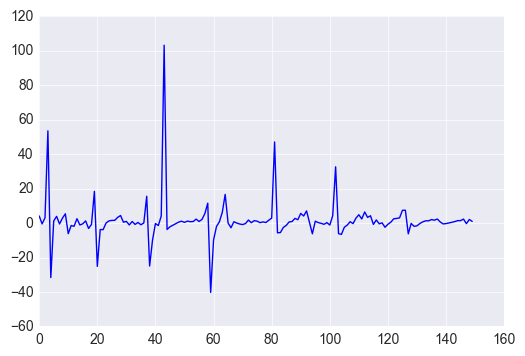

In [217]:
#Plot X position array first 150 samples with window size 10
x = rolling_mean(position[:150,0], 10)
plt.plot(x)
plt.show()

#Will need to iterate with window size - this looks like a heartbeat 

### Note

75 BPM
50 samples/second

Normal heart rate is 60 - 100 BPM which means every se

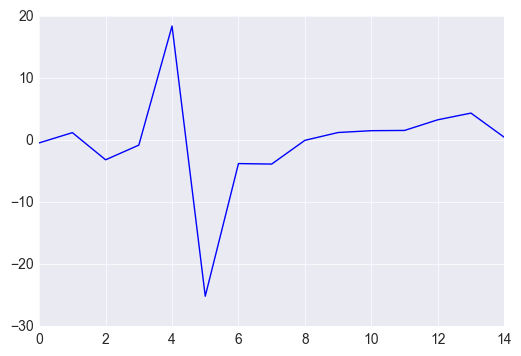

In [248]:
#Plot X position array first 150 samples with window size 10
x = rolling_mean(position[:150,0], 10)
plt.plot(x[15:30])
plt.show()

In [218]:
#Really unsure how this works - buterworth filter
from scipy import signal

# First, design the Buterworth filter
N  = 1    # Filter order
Wn = 0.15 # Cutoff frequency
B, A = signal.butter(N, Wn, output='ba')
 
# Second, apply the filter
x_filter = signal.filtfilt(B,A, x)

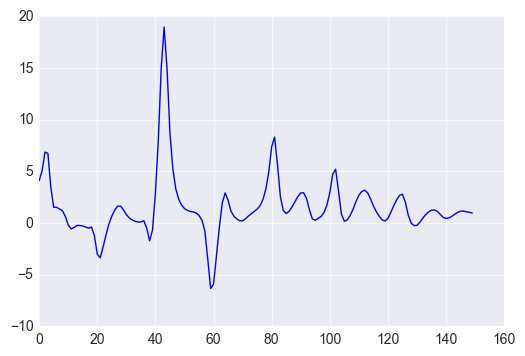

In [219]:
plt.plot(x_filter)
plt.show()

C:\Users\danil\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


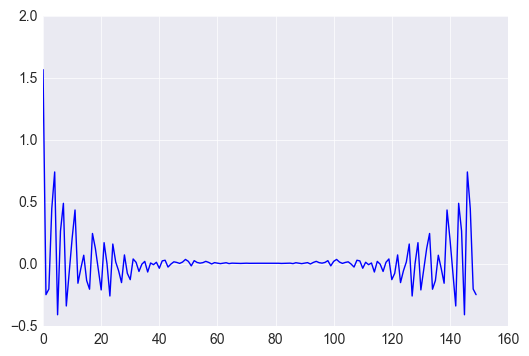

In [220]:
#Really unsure how this works - Fourier transform
plt.plot(np.fft.ifft(x_filter))
plt.show()